In [15]:
# Dependencies
import pandas as pd
import numpy as np
import yfinance as yf
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta
import statsmodels.tsa.stattools as ts 
from scipy.stats import linregress

In [2]:
# Create lists of securities in portfolio
pfolio_etfs = ['SPY', 'DSTL', 'VNQ', 'PAVE', 'QQQ', 'VOO', 'ARKK']
pfolio_stocks = ['UPST', 'CRWD', 'DXLG', 'DOCN', 'ASAN', 'TWTR', 'AAPL', 'AI', 'PLTR', 'F', 'CFLT', 'TSLA']
    

In [9]:
# function to create dataframes with each etf ticker
def etfs_to_df():
    etf_list = list()
    for ticker in pfolio_etfs:
        data = yf.download(ticker, group_by="Ticker", period='1d')
        data['ticker'] = ticker
        etf_list.append(data)

    etf_df = pd.concat(etf_list)
    return etf_df

In [10]:
# Test
etfs_to_df()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,ticker
Date,,,,,,,
2022-03-03,440.470001,441.109985,433.853485,438.829987,438.829987,59952008,SPY
2022-03-03,44.410000,44.604900,44.094002,44.490002,44.490002,29691,DSTL
2022-03-03,104.489998,104.870003,103.490601,104.794998,104.794998,3104927,VNQ
2022-03-03,27.309999,27.457100,26.969999,27.355000,27.355000,620852,PAVE
2022-03-03,349.929993,350.026489,342.471008,346.005005,346.005005,43092698,QQQ
2022-03-03,405.019989,405.540009,399.320007,403.475586,403.475586,5390319,VOO
2022-03-03,68.021301,68.032501,63.720001,64.669998,64.669998,16097353,ARKK


In [11]:
# function to create dataframes with each stock ticker
def stocks_to_df():
    stock_list = list()
    for ticker in pfolio_stocks:
        data = yf.download(ticker, group_by="Ticker", period='1d')
        data['ticker'] = ticker
        stock_list.append(data)

    stocks_df = pd.concat(stock_list)
    return stocks_df

In [12]:
stocks_to_df()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,ticker
Date,,,,,,,
2022-03-03,148.690002,156.759995,143.610901,150.824997,150.824997,6820280,UPST
2022-03-03,200.000000,204.800003,190.533798,194.164993,194.164993,2967136,CRWD
2022-03-03,4.260000,4.340000,4.110000,4.310000,4.310000,160723,DXLG
2022-03-03,63.230000,63.889999,58.950901,60.770000,60.770000,1173174,DOCN
2022-03-03,52.340000,53.459999,47.700001,49.436401,49.436401,2281279,ASAN
2022-03-03,34.900002,35.169998,33.735001,34.169998,34.169998,8520217,TWTR
2022-03-03,168.470001,168.910004,165.899994,167.740005,167.740005,44500156,AAPL
2022-03-03,25.340000,26.469999,22.670000,23.780001,23.780001,9867839,AI
2022-03-03,12.010000,12.055000,11.365000,11.485000,11.485000,27559699,PLTR


In [14]:
def plot_etfs():
    fig = go.Figure(data=[go.Candlestick(x=etf_df['ticker'],
                         open=etf_df['Open'],
                         high=etf_df['High'],
                         low=etf_df['Low'],
                         close=etf_df['Close'])])
    fig.update_layout(
        title = 'Portfolio ETF Prices',
        yaxis_title = 'Price (USD Per Share)')

In [15]:
plot_etfs()

NameError: name 'etf_df' is not defined

# Alternate Attempt
Using a tutorial from this medium article:
https://medium.com/datadriveninvestor/this-algorithm-is-finally-making-money-a52d3f99c792

In [2]:
# Create a function for importing our data and returning a dataframe

def download_data(stock, start, end):
    stock_data = {}
    ticker = yf.download(stock,start,end)
    stock_data['Price'] = ticker['Adj Close']
    return pd.DataFrame(stock_data)

In [6]:
# Create a function for plotting stock prices
def plot_pairs(data1, data2):
    fig, (ax1, ax2) = plt.subplots(2)
    fig.suptitle('TSLA/AAPL Price')
    ax1.plot(data1)
    ax2.plot(data2)
    plt.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


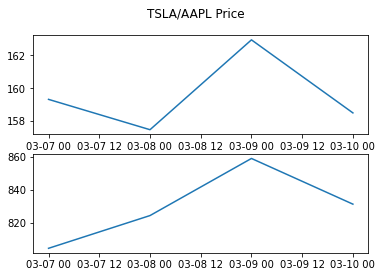

In [21]:
# Create initiation function to execute script

if __name__ == '__main__':
    start_date = datetime.datetime.now() - timedelta(days=3)
    end_date = datetime.datetime.now()
    
    pair1 = download_data('AAPL', start_date, end_date)
    pair2 = download_data('TSLA', start_date, end_date)
    
    plot_pairs(pair1,pair2)
    
    